# Module 2: EDA

## Exercise 1. Understanding the problem space

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
data_path = "/mnt/c/Users/Adriana/Desktop/ZRIVE/data/groceries/sampled-datasets/"

## Reading and understanding the files
**orders_parquet**: An order history of customers. 
Each row is an order and the item_ids for the order are stored as a list in the ordered_items column.

In [3]:
orders = pd.read_parquet(data_path + "orders.parquet")
orders.head()

,id,user_id,created_at,order_date,user_order_seq,ordered_items
10,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045..."
20,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058..."
21,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618..."
34,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624..."
49,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163..."


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 10 to 64538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8773 non-null   int64         
 1   user_id         8773 non-null   object        
 2   created_at      8773 non-null   datetime64[us]
 3   order_date      8773 non-null   datetime64[us]
 4   user_order_seq  8773 non-null   int64         
 5   ordered_items   8773 non-null   object        
dtypes: datetime64[us](2), int64(2), object(2)
memory usage: 479.8+ KB


In [5]:
orders['user_order_seq'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])


This dataset contains several key columns that provide comprehensive details about each order:

1. Order ID: unique identifier for each order
2. User ID: unique identifier for the user who placed the order.
3. Created At: timestamp that indicates the exact time when the order was placed.
4. Order Date:  day on which the order was created, separate from the time. 
5. User Order Sequence (user_order_seq): likely represents the sequential number of the order for each user, with '1' indicating the user's first order, and so on. This will help in understanding customer ordering behavior, such as frequency and retention.
6. Ordered Items: list of the items that were included in each order.

**regulars.parquet**: Users are allowed to specify items that they wish to buy regularly. 
This data gives the items each user has asked to get regularly, along with when they input that information.


In [6]:
regulars = pd.read_parquet(data_path + "regulars.parquet")
regulars

,user_id,variant_id,created_at
3,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33618848088196,2020-04-30 15:07:03
11,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667178659972,2020-05-05 23:34:35
18,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,33619009208452,2020-04-30 15:07:03
46,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,33667305373828,2020-05-05 23:34:35
47,4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...,33667247341700,2020-05-06 14:42:11
...,...,...,...
37644,20a41b8fa616484b39812aaa377ea1b53247f6941c0586...,39265878999172,2022-03-13 16:02:13
37717,ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...,39459281272964,2022-03-14 07:49:24
37718,ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...,33973246951556,2022-03-14 07:49:24
37719,ba068a3398230c10a98868ced1fcc5b889b21e6f112fd0...,39587297656964,2022-03-14 07:49:24


This dataset provides us with information about the user's regular items:
1. user_id: unique identifier for the user who added a product to his/her regular list.
2. variant_id: unique identifier for the product that has been added to the regular list.
3. created_at: timestamp that indicates the exact time when the product was added to the user's regular's list.

I group by user_id and created_at to get a list of regular items for each user. This way, I have the complete list of regular items of each user until each day.

In [7]:
grouped_regulars = regulars.groupby(['user_id', 'created_at']).agg({
    'variant_id': lambda x: list(x)
}).reset_index()

# Renaming column for clarity
grouped_regulars.rename(columns={'variant_id': 'regular_items'}, inplace=True)

grouped_regulars.head()

,user_id,created_at,regular_items
0,004b3e3cb9a9f5b0974ce4179db394057c72e7a82077bf...,2021-12-21 21:48:05,[33667274997892]
1,005743eefffa4ce840608c4f47b8c548b134d89be5c390...,2021-06-09 08:40:19,"[34081589887108, 34519123951748]"
2,0074992079c1836c6509eec748a973dc97388b4877e770...,2020-05-18 20:35:53,"[33667222896772, 33826414526596, 3382641364186..."
3,00ecced73edb11d4bab08e794656dcf9d9b89ea89c5918...,2021-01-23 09:01:42,"[33667283648644, 33667214246020, 34221708083332]"
4,014301579c18e7c7f034e544ab3d4ee235ef2de43ee5db...,2021-06-15 09:09:37,"[33803538432132, 34221708771460, 3366718265766..."


**abandoned_cart.parquet**: If a user has added items to their basket but not bought them, we capture that information. 
Items that were abandoned are stored as a list in variant_id.

In [8]:
abandoned_carts = pd.read_parquet(data_path + "abandoned_carts.parquet")
abandoned_carts.head()

,id,user_id,created_at,variant_id
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20 13:53:24,"[33826459287684, 33826457616516, 3366719212762..."
13,20352449839236,9d6187545c005d39e44d0456d87790db18611d7c7379bd...,2021-06-27 05:24:13,"[34415988179076, 34037940158596, 3450282236326..."
45,20478401413252,e83fb0273d70c37a2968fee107113698fd4f389c442c0b...,2021-07-18 08:23:49,"[34543001337988, 34037939372164, 3411360609088..."
50,20481783103620,10c42e10e530284b7c7c50f3a23a98726d5747b8128084...,2021-07-18 21:29:36,"[33667268116612, 34037940224132, 3443605520397..."
52,20485321687172,d9989439524b3f6fc4f41686d043f315fb408b954d6153...,2021-07-19 12:17:05,"[33667268083844, 34284950454404, 33973246886020]"


As previously mentioned, this dataset provides information about items that were once in the basquet, but where finally abandoned. The columns are the following:
1. id: unique identifier for each order.
2. user_id: unique identifier for the user placing the order.
3. created_at: timestamp that indicates the exact time when the order was placed.
4. variant_id: list of products that were abandoned.

**inventory.parquet**: Some information about each item_id


In [9]:
inventory = pd.read_parquet(data_path + "inventory.parquet")
inventory.head()

,variant_id,price,compare_at_price,vendor,product_type,tags
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]"
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
3,33667283583108,1.79,1.99,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, tissue, vegan]"
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories]


The dataset comprises several columns, each providing essential information about supermarket products:

1. Variant_ID:  unique identifier for each product.
2. Price: retail price at which the supermarket is selling the product.
3. Compare_At_Price: this likely refers to the competitor’s price for the same product. It's used for competitive analysis.
4. Vendor: names of the manufacturer or supplier of the product. 
5. Product_Type: classifies the product into various categories, such as "dental", "condiments-dressing", etc.
6. Tags: list of descriptors tagging the product with specific attributes like "table-sauces", "vegan", "tissue", etc.

**users.parquet**: Information about users.

In [10]:
users = pd.read_parquet(os.path.join(data_path, "users.parquet"))
users.head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
2160,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1123,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1958,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN
675,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN
4694,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN


In [11]:
users['user_segment'].unique()

array(['Top Up', 'Proposition'], dtype=object)

This dataset provides detailed information about each user, structured as follows:
1. User_ID: unique identifier for each user.
2. User_Segment: users are classified into two categories: 'top up' and 'proposition'. The 'top up' category might represent users who frequently fill up or top up their accounts, suggesting higher loyalty or more regular engagement with services or products. However, to fully understand the criteria used for this classification, it would be a good idea to consult the person or documentation that defined these categories. Additionally, it would be interesting to divide the study into these two different categories.
3. User_NUTS1: NUTS1 code, which refers to the first and top level in the Nomenclature of Territorial Units for Statistics (NUTS) developed by the European Union. NUTS1 regions typically encompass major socio-economic regions within countries, indicating the broader geographical area where the user is located.
4. First_Ordered_At: timestamp that indicates when the user placed their first order. Analyzing this data can help identify whether the user is a new or returning client and gauge the longevity of their engagement.
5. Customer_Cohort_Month: This field likely represents the month in which the user was first acquired or made their first purchase.
6. Count_people, count_adults, count_children, count_babies, count_pets: this set of columns provides insight into the household composition of each user.

## Manipulating and joining the datasets

In order to know how we wish to manipulate the data, we first have to understant which questions we want to answer. These are:
* How many products does the company sell
* How many products are abandoned
* How many regular products are sold 
* What are the best selling products
* Which are the top clients
* What is the profile of the clients
* Do users define their regular products?

These questions will be answered in section 2.

Join orders with regular. I consider an order to defined by <user_id, created_at>.

In [12]:
order_regular = pd.merge(orders, grouped_regulars, on='user_id', how='left', suffixes=('_ORDER', '_REGULAR'))
order_regular.head()

,id,user_id,created_at_ORDER,order_date,user_order_seq,ordered_items,created_at_REGULAR,regular_items
0,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045...",2020-04-30 13:09:27,"[33618909495428, 33618981421188, 3361886017958..."
1,2204707520644,bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...,2020-04-30 17:39:00,2020-04-30,1,"[33618835243140, 33618835964036, 3361886244058...",2020-05-23 14:14:13,"[33618835964036, 33618996723844, 3361899672384..."
2,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618...",2020-04-30 17:06:48,"[33618998853764, 33618846580868, 3361899659277..."
3,2208967852164,f6451fce7b1c58d0effbe37fcb4e67b718193562766470...,2020-05-01 19:44:11,2020-05-01,1,"[33618830196868, 33618846580868, 3361891234624...",2020-07-30 11:23:00,"[33667222798468, 33667229155460, 3382642386547..."
4,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163...",2020-04-30 15:07:03,"[33618848088196, 33619009208452, 3361899141542..."


In [13]:
len(order_regular)

10722

If the order is earlier than the date the customer defined its regular products, remove the aligned row. 
But we should keep rows where created_at_REGULAR is null, since there can be an order where the customer has not defined his regular products yet.


In [14]:
# But we should keep rows where created_at_ABANDONED is null, since there can be an order with no abandoned items!
order_regular = order_regular[(order_regular['created_at_REGULAR'] < order_regular['created_at_ORDER']) | 
                               (order_regular['created_at_REGULAR'].isna())]
order_regular.head()

,id,user_id,created_at_ORDER,order_date,user_order_seq,ordered_items,created_at_REGULAR,regular_items
0,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045...",2020-04-30 13:09:27,"[33618909495428, 33618981421188, 3361886017958..."
2,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618...",2020-04-30 17:06:48,"[33618998853764, 33618846580868, 3361899659277..."
4,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163...",2020-04-30 15:07:03,"[33618848088196, 33619009208452, 3361899141542..."
5,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,"[33667168796804, 33667178594436, 3366720605402...",NaT,NaN
6,2219446730884,7ce6569d75a8bc75b72516e059edecb0bc2245750bfa68...,2020-05-04 23:57:21,2020-05-04,1,"[33667178594436, 33667184492676, 3366721657254...",2020-05-04 22:22:56,"[33667295084676, 33667258089604, 3366730858509..."


In [15]:
len(order_regular)

7678

Now I want to know what are the products that have been abandoned by the client on the day he/she has done the order. To do so, I join the transformed data with abandoned_cart, following the same idea as before.

In [16]:
data_abandoned = pd.merge(order_regular, abandoned_carts, on='user_id', how='left', suffixes=('_ORDER', '_ABANDONED'))

# Change variant_id for abandoned_items for clarity
data_abandoned = data_abandoned.rename(columns={'variant_id': 'abandoned_items'})
data_abandoned = data_abandoned.rename(columns={'created_at': 'created_at_ABANDONED'})


data_abandoned.head()

,id_ORDER,user_id,created_at_ORDER,order_date,user_order_seq,ordered_items,created_at_REGULAR,regular_items,id_ABANDONED,created_at_ABANDONED,abandoned_items
0,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045...",2020-04-30 13:09:27,"[33618909495428, 33618981421188, 3361886017958...",2.087386e+13,2021-09-07 08:02:51,"[34081589887108, 34317850116228, 3413738926912..."
1,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,"[33618849693828, 33618860179588, 3361887404045...",2020-04-30 13:09:27,"[33618909495428, 33618981421188, 3361886017958...",2.172375e+13,2022-01-03 16:41:02,"[33826465153156, 39336623767684, 3448854845862..."
2,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618...",2020-04-30 17:06:48,"[33618998853764, 33618846580868, 3361899659277...",NaN,NaT,NaN
3,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163...",2020-04-30 15:07:03,"[33618848088196, 33619009208452, 3361899141542...",NaN,NaT,NaN
4,2217346236548,66a7b6a77952abc3ef3246da56fb148814704a3c2b420c...,2020-05-04 11:25:26,2020-05-04,1,"[33667168796804, 33667178594436, 3366720605402...",NaT,NaN,2.185231e+13,2022-01-20 18:38:57,[34415987753092]


In [17]:
len(data_abandoned)

15304

In [18]:
# rows where the abandoned date is > order date should be discarted
# But we should keep rows where created_at_ABANDONED is null, since there can be an order with no abandoned items!
data = data_abandoned[(data_abandoned['created_at_ABANDONED'] < data_abandoned['created_at_ORDER']) | 
                       (data_abandoned['created_at_ABANDONED'].isna())]


data.head()

,id_ORDER,user_id,created_at_ORDER,order_date,user_order_seq,ordered_items,created_at_REGULAR,regular_items,id_ABANDONED,created_at_ABANDONED,abandoned_items
2,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618...",2020-04-30 17:06:48,"[33618998853764, 33618846580868, 3361899659277...",NaN,NaT,NaN
3,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163...",2020-04-30 15:07:03,"[33618848088196, 33619009208452, 3361899141542...",NaN,NaT,NaN
5,2219446730884,7ce6569d75a8bc75b72516e059edecb0bc2245750bfa68...,2020-05-04 23:57:21,2020-05-04,1,"[33667178594436, 33667184492676, 3366721657254...",2020-05-04 22:22:56,"[33667295084676, 33667258089604, 3366730858509...",NaN,NaT,NaN
6,2222574076036,f4f0753d9919c6d39afc6b1d797a34e31224698d5d92a5...,2020-05-05 21:09:55,2020-05-05,1,"[33667168829572, 33667195437188, 3366721860416...",2020-05-05 19:39:53,"[33667282436228, 33667305373828]",NaN,NaT,NaN
7,2224066986116,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,2020-05-06 10:23:11,2020-05-06,1,"[33667171221636, 33667177382020, 3366717856166...",2020-05-05 23:34:35,"[33667178659972, 33667305373828, 3366717122163...",NaN,NaT,NaN


In [19]:
len(data)

7590

For the users dataset, in order to know how many regular products each user has, I add a column cpunt_regulars.

In [20]:
# Add a column that counts how many regular products there are
count_regulars = regulars.groupby('user_id')['variant_id'].nunique().reset_index().rename(columns = {'variant_id': 'count_regulars'})

# Add to the users dataset this new column
users = users.merge(count_regulars, on = 'user_id', how='left')

# Replace Nans with 0 values
users = users.fillna({'count_regulars' : 0})
users.head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets,count_regulars
0,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0
1,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0
2,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0
3,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0
4,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0


## 1. Performing quick checks
Do all the quick/sanity checks and find any potential issues with the data. Fix them as you see fit.

**a. Revisar los datos: tamaño del dataset, shape**

In [21]:
data.shape

(7590, 11)

The dataset had 7590 rows and 11 columns

In [22]:
data.head()

,id_ORDER,user_id,created_at_ORDER,order_date,user_order_seq,ordered_items,created_at_REGULAR,regular_items,id_ABANDONED,created_at_ABANDONED,abandoned_items
2,2204838822020,329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...,2020-04-30 18:12:30,2020-04-30,1,"[33618891145348, 33618893570180, 3361889766618...",2020-04-30 17:06:48,"[33618998853764, 33618846580868, 3361899659277...",NaN,NaT,NaN
3,2215889436804,68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...,2020-05-03 21:56:14,2020-05-03,1,"[33667166699652, 33667166699652, 3366717122163...",2020-04-30 15:07:03,"[33618848088196, 33619009208452, 3361899141542...",NaN,NaT,NaN
5,2219446730884,7ce6569d75a8bc75b72516e059edecb0bc2245750bfa68...,2020-05-04 23:57:21,2020-05-04,1,"[33667178594436, 33667184492676, 3366721657254...",2020-05-04 22:22:56,"[33667295084676, 33667258089604, 3366730858509...",NaN,NaT,NaN
6,2222574076036,f4f0753d9919c6d39afc6b1d797a34e31224698d5d92a5...,2020-05-05 21:09:55,2020-05-05,1,"[33667168829572, 33667195437188, 3366721860416...",2020-05-05 19:39:53,"[33667282436228, 33667305373828]",NaN,NaT,NaN
7,2224066986116,aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...,2020-05-06 10:23:11,2020-05-06,1,"[33667171221636, 33667177382020, 3366717856166...",2020-05-05 23:34:35,"[33667178659972, 33667305373828, 3366717122163...",NaN,NaT,NaN


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7590 entries, 2 to 15303
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_ORDER              7590 non-null   int64         
 1   user_id               7590 non-null   object        
 2   created_at_ORDER      7590 non-null   datetime64[us]
 3   order_date            7590 non-null   datetime64[us]
 4   user_order_seq        7590 non-null   int64         
 5   ordered_items         7590 non-null   object        
 6   created_at_REGULAR    4140 non-null   datetime64[us]
 7   regular_items         4140 non-null   object        
 8   id_ABANDONED          5885 non-null   float64       
 9   created_at_ABANDONED  5885 non-null   datetime64[us]
 10  abandoned_items       5885 non-null   object        
dtypes: datetime64[us](4), float64(1), int64(2), object(4)
memory usage: 711.6+ KB


We can observe we have some  NULL values in the dataset, for the last columns, as be commented earlier. 
These missing values will be analyzed later.

In [24]:
data.isna().sum()

id_ORDER                   0
user_id                    0
created_at_ORDER           0
order_date                 0
user_order_seq             0
ordered_items              0
created_at_REGULAR      3450
regular_items           3450
id_ABANDONED            1705
created_at_ABANDONED    1705
abandoned_items         1705
dtype: int64

Now for the other two datasets:

In [25]:
print(inventory.shape)
inventory.head()

(1733, 6)


,variant_id,price,compare_at_price,vendor,product_type,tags
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]"
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
3,33667283583108,1.79,1.99,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, tissue, vegan]"
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories]


In [26]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 81.4+ KB


We can observe that there are 1733 rows, that is, different registered products. Furthermore there are no null values, so the information of every product is complete. It is worth mentioning that the dataframe contains 6 columns.

In [27]:
print(users.shape)
users.head()

(4983, 11)


,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets,count_regulars
0,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0
1,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0
2,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0
3,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0
4,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0


In [28]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4983 entries, 0 to 4982
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
 10  count_regulars         4983 non-null   float64
dtypes: float64(6), object(5)
memory usage: 428.4+ KB


We can observe the users dataframe consists of 4983 entries and 10 columns, and it contains lots of missing values, which will be analyzed later.

**b. Data types de las features**

Buscamos errores en los tipos, datos mezclados en una misma columna, tipos que no tiene sentido respecto al nombres, etc.


With the previous command, we can see the data type of each column:

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7590 entries, 2 to 15303
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_ORDER              7590 non-null   int64         
 1   user_id               7590 non-null   object        
 2   created_at_ORDER      7590 non-null   datetime64[us]
 3   order_date            7590 non-null   datetime64[us]
 4   user_order_seq        7590 non-null   int64         
 5   ordered_items         7590 non-null   object        
 6   created_at_REGULAR    4140 non-null   datetime64[us]
 7   regular_items         4140 non-null   object        
 8   id_ABANDONED          5885 non-null   float64       
 9   created_at_ABANDONED  5885 non-null   datetime64[us]
 10  abandoned_items       5885 non-null   object        
dtypes: datetime64[us](4), float64(1), int64(2), object(4)
memory usage: 711.6+ KB


id_ORDER, user_id, and id_ABANDONED should be strings:

In [30]:
data['id_ORDER'] = data['id_ORDER'].astype(str)
data['user_id'] = data['user_id'].astype(str)
data['id_ABANDONED'] = data['id_ABANDONED'].astype(str)

/tmp/ipykernel_154450/1361214988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['id_ORDER'] = data['id_ORDER'].astype(str)
/tmp/ipykernel_154450/1361214988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['user_id'] = data['user_id'].astype(str)
/tmp/ipykernel_154450/1361214988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7590 entries, 2 to 15303
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_ORDER              7590 non-null   object        
 1   user_id               7590 non-null   object        
 2   created_at_ORDER      7590 non-null   datetime64[us]
 3   order_date            7590 non-null   datetime64[us]
 4   user_order_seq        7590 non-null   int64         
 5   ordered_items         7590 non-null   object        
 6   created_at_REGULAR    4140 non-null   datetime64[us]
 7   regular_items         4140 non-null   object        
 8   id_ABANDONED          7590 non-null   object        
 9   created_at_ABANDONED  5885 non-null   datetime64[us]
 10  abandoned_items       5885 non-null   object        
dtypes: datetime64[us](4), int64(1), object(6)
memory usage: 711.6+ KB


Check the objects are listst (of items), and the type of the elements on the lists:

In [32]:
print(type(data['ordered_items'].iloc[0]))
print(type(data['ordered_items'].iloc[0][0]))

<class 'numpy.ndarray'>
<class 'numpy.int64'>


In [33]:
print(type(data['regular_items'].iloc[0]))
print(type(data['regular_items'].iloc[0][0]))

<class 'list'>
<class 'int'>


We can observe that that it is a list instead of a numpy array. Since the values that will be stored in the lists of this columns are always going to be integers, we convert the list to a numpy.ndarray.

In [34]:
data['regular_items'] = data['regular_items'].apply(np.array)

/tmp/ipykernel_154450/2162758704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['regular_items'] = data['regular_items'].apply(np.array)


In [35]:
print(type(data['regular_items'].iloc[0]))
print(type(data['regular_items'].iloc[0][0]))

<class 'numpy.ndarray'>
<class 'numpy.int64'>


In [36]:
print(type(data['abandoned_items'].iloc[0]))

<class 'float'>


Since some rows contain NaN, Pandas interprets them as floats when mixed with our lists of  integers in the column abandoned_items.
To solve this, we will convert the NaNs to empty lists in the next section and, afterwards, we will check the type is the correct one.

Now for the other two datasets:

In [37]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 81.4+ KB


We can observe that the types correspond to what we would have expected.

In [38]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4983 entries, 0 to 4982
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
 10  count_regulars         4983 non-null   float64
dtypes: float64(6), object(5)
memory usage: 428.4+ KB


First_ordered_at should be a date, and so should be customer_cohort_month. 

On the other hand, all the counts (count_people, count_adults, count_children, count_babies, and count_pets) should be integers. Nevertheless, these count types will need to be changed after the missing values are delt with.

In [39]:
users['first_ordered_at'] = users['first_ordered_at'].astype('datetime64[us]')
users['customer_cohort_month'] = users['customer_cohort_month'].astype('datetime64[us]')

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4983 entries, 0 to 4982
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                4983 non-null   object        
 1   user_segment           4983 non-null   object        
 2   user_nuts1             4932 non-null   object        
 3   first_ordered_at       4983 non-null   datetime64[us]
 4   customer_cohort_month  4983 non-null   datetime64[us]
 5   count_people           325 non-null    float64       
 6   count_adults           325 non-null    float64       
 7   count_children         325 non-null    float64       
 8   count_babies           325 non-null    float64       
 9   count_pets             325 non-null    float64       
 10  count_regulars         4983 non-null   float64       
dtypes: datetime64[us](2), float64(6), object(3)
memory usage: 428.4+ KB


**c. Missing values**

We have missing values in the columns: created_at_REGULAR, regular_items, created_at_ABANDONED, abandoned_items.
Since having missing values in regular_items and abandoned_items means that the user has not defined items that he wishes to buy
regularly or has not abandoned any item, I convert these Nans to empty arrays.

In [40]:
data['regular_items'] = data['regular_items'].apply(lambda x: [] if x is None or (isinstance(x, float) and pd.isna(x)) else x)

/tmp/ipykernel_154450/1908790303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['regular_items'] = data['regular_items'].apply(lambda x: [] if x is None or (isinstance(x, float) and pd.isna(x)) else x)


In [41]:
data['abandoned_items'] = data['abandoned_items'].apply(lambda x: [] if x is None or (isinstance(x, float) and pd.isna(x)) else x)

/tmp/ipykernel_154450/3274599685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['abandoned_items'] = data['abandoned_items'].apply(lambda x: [] if x is None or (isinstance(x, float) and pd.isna(x)) else x)


In [42]:
print(type(data['abandoned_items'].iloc[3000])) 
print(type(data['abandoned_items'].iloc[3000][0])) # don't get the first element of the first row, since this list is empty

<class 'numpy.ndarray'>
<class 'numpy.int64'>


And the missing values corresponding to the dates of these columns are replaced with the date of the order.

In [43]:
data['created_at_REGULAR'] = data['created_at_REGULAR'].fillna(data['created_at_ORDER'])
data['created_at_ABANDONED'] = data['created_at_ABANDONED'].fillna(data['created_at_ORDER'])

/tmp/ipykernel_154450/2386947241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['created_at_REGULAR'] = data['created_at_REGULAR'].fillna(data['created_at_ORDER'])
/tmp/ipykernel_154450/2386947241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['created_at_ABANDONED'] = data['created_at_ABANDONED'].fillna(data['created_at_ORDER'])


Finally, check there are no more missing values:

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7590 entries, 2 to 15303
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id_ORDER              7590 non-null   object        
 1   user_id               7590 non-null   object        
 2   created_at_ORDER      7590 non-null   datetime64[us]
 3   order_date            7590 non-null   datetime64[us]
 4   user_order_seq        7590 non-null   int64         
 5   ordered_items         7590 non-null   object        
 6   created_at_REGULAR    7590 non-null   datetime64[us]
 7   regular_items         7590 non-null   object        
 8   id_ABANDONED          7590 non-null   object        
 9   created_at_ABANDONED  7590 non-null   datetime64[us]
 10  abandoned_items       7590 non-null   object        
dtypes: datetime64[us](4), int64(1), object(6)
memory usage: 711.6+ KB


Additionally, for the inventory dataframe, we previously saw that it does not contain any missing values. On the other hand, the users dataframe does.

In [45]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4983 entries, 0 to 4982
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                4983 non-null   object        
 1   user_segment           4983 non-null   object        
 2   user_nuts1             4932 non-null   object        
 3   first_ordered_at       4983 non-null   datetime64[us]
 4   customer_cohort_month  4983 non-null   datetime64[us]
 5   count_people           325 non-null    float64       
 6   count_adults           325 non-null    float64       
 7   count_children         325 non-null    float64       
 8   count_babies           325 non-null    float64       
 9   count_pets             325 non-null    float64       
 10  count_regulars         4983 non-null   float64       
dtypes: datetime64[us](2), float64(6), object(3)
memory usage: 428.4+ KB


First, since an order necessarily involves at least one adult, where count_adults data is missing, it is logical to assume the presence of one adult. Therefore, the missing values of the column count_adults will be changed to 1:

In [46]:
users['count_adults'] = users['count_adults'].fillna(1)

Reassessing Household Composition Columns (count_children, count_babies, count_pets):
* Original Plan: Initially, I considered filling missing values with 0, presuming the absence of children, babies, or pets if not explicitly mentioned. Nevertheless, reflecting further, I recognized that such an assumption might not hold true due to the significant volume of missing data. Filling these values without concrete evidence could introduce substantial bias.
* Current Approach: I decided to maintain the NaN values to avoid baseless assumptions. This choice preserves the dataset's integrity and provides a more genuine basis for analysis. Additionally, I plan to utilize a representative sample to infer broader trends with the samples with houshold information.

Finally, the count_people field, when missing, will now be calculated as the sum of count_adults, count_children, and count_babies, assuming it represents the total human count in a household.

In [47]:
users['count_people'] = users.apply(lambda row: row['count_adults'] + row['count_children'] + row['count_babies'] + row['count_pets']
                                   if pd.isna(row['count_people']) else row['count_people'], axis=1)

Now, change the types to integers, as previously mentioned.

In [49]:
users['count_people'] = users['count_people'].astype('int64')
users['count_adults'] = users['count_adults'].astype('int64')
#users['count_children'] = users['count_children'].astype('int64')
#users['count_babies'] = users['count_babies'].astype('int64')
#users['count_pets'] = users['count_pets'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [50]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4983 entries, 0 to 4982
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                4983 non-null   object        
 1   user_segment           4983 non-null   object        
 2   user_nuts1             4932 non-null   object        
 3   first_ordered_at       4983 non-null   datetime64[us]
 4   customer_cohort_month  4983 non-null   datetime64[us]
 5   count_people           325 non-null    float64       
 6   count_adults           4983 non-null   float64       
 7   count_children         325 non-null    float64       
 8   count_babies           325 non-null    float64       
 9   count_pets             325 non-null    float64       
 10  count_regulars         4983 non-null   float64       
dtypes: datetime64[us](2), float64(6), object(3)
memory usage: 428.4+ KB


## 2. Understanding the problem
Understand the problem at hand through data interrogation and hypothesis testing.

Gather all the hypothesis and insights you have tested and found.


Data interrogation:
* How many products does the company sell
* How many products are abandoned
* How many regular products are sold 
* What are the best selling products
* Which are the top clients
* What is the profile of the clients
* Are our clients loyal, or do they only have one order?
* Do users define their regular products?
* What kind of products do users define as their regulars

**a. How many products does the company sell each day**

First, I calculate the number of products bought in each order:

In [51]:
data['product_order_count'] = data['ordered_items'].apply(len)

/tmp/ipykernel_154450/1249169935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['product_order_count'] = data['ordered_items'].apply(len)


Now, plot an histogram with the number of sold products. For clarity, I do a different plot for each year and plot the monthly sales.

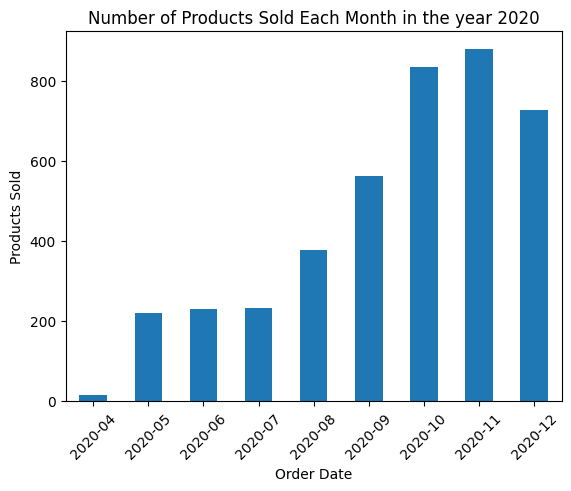

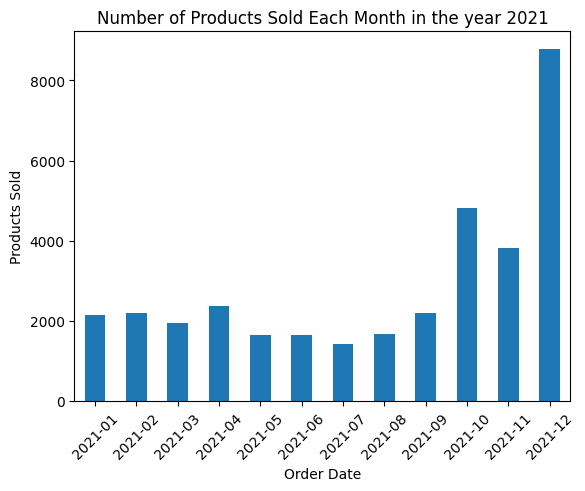

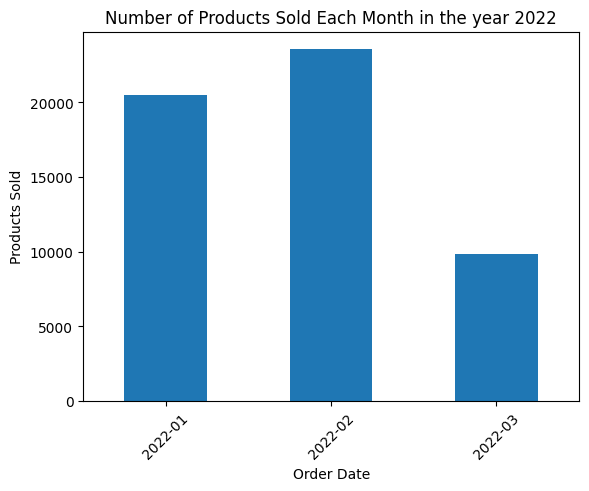

In [52]:
# Aggregate counts by order year and month
grouped_data = data.groupby([data['order_date'].dt.year, data['order_date'].dt.month])
monthly_sales = grouped_data['product_order_count'].sum()

for year in monthly_sales.index.get_level_values(0).unique():
    monthly_sales.loc[year].plot(kind='bar')
    plt.title(f'Number of Products Sold Each Month in the year {year}')
    plt.xlabel('Order Date')
    plt.ylabel('Products Sold')
    plt.xticks(ticks=range(len(monthly_sales.loc[year])), labels=[f'{year}-{month:02d}' for month in monthly_sales.loc[year].index], rotation=45)
    plt.show()

To get a more general overview, plot all the years together:

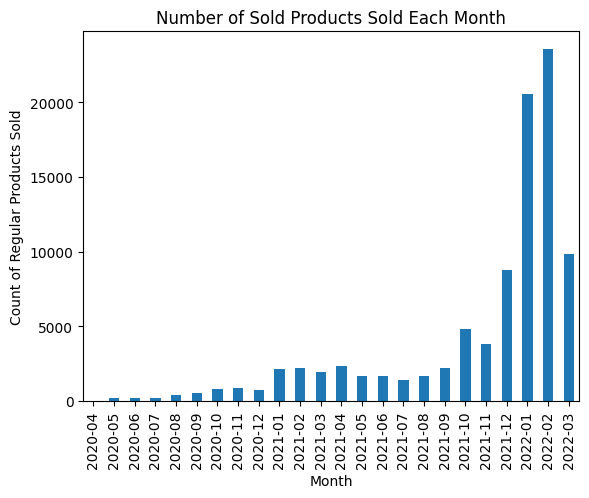

In [53]:
monthly_sales.plot(kind='bar')
plt.title('Number of Sold Products Sold Each Month')
plt.xlabel('Month')
plt.ylabel('Count of Regular Products Sold')
plt.xticks(ticks=range(len(monthly_sales)), labels=[f'{year}-{month:02d}' for year, month in monthly_sales.index], rotation=90)
plt.show()

We can observe that the last months of the year are the ones when more products are sold. Furthermore, in January and February of 2022 we can observe that the company arrived to the most successful month, with more than 8000 products sold.

Something that caughts my attention is how the number of products sold increases drastically each year, indicating that, probably, the strategies been performed by the company are flourishing.

**b. How many products are abandoned**

To get more insights, I will plot the number of prodcuts abandoned each month, together with the number of products that are indeed sold.

In [54]:
data['product_abandoned_count'] = data['abandoned_items'].apply(len)

/tmp/ipykernel_154450/3027958918.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['product_abandoned_count'] = data['abandoned_items'].apply(len)


/tmp/ipykernel_154450/1745198578.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  monthly_data = grouped_data.agg({


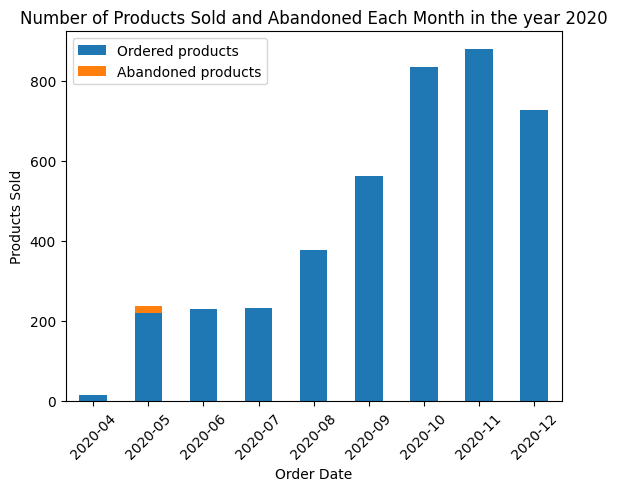

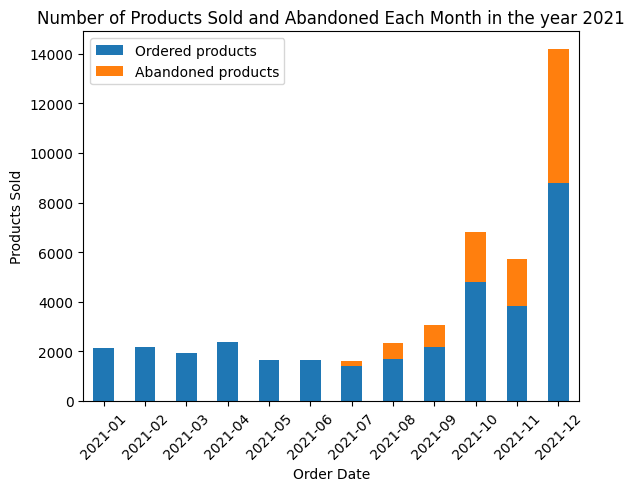

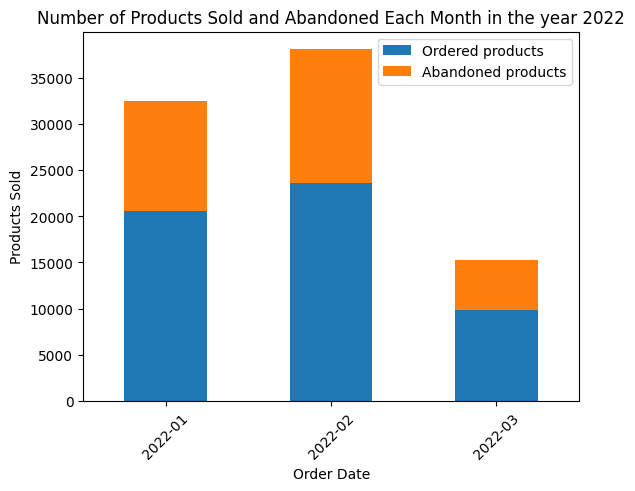

In [55]:
# Aggregate counts by order year and month
grouped_data = data.groupby([data['order_date'].dt.year, data['order_date'].dt.month])
monthly_data = grouped_data.agg({
    'product_order_count' : 'sum',
    'product_abandoned_count' : sum
    })

for year in monthly_sales.index.get_level_values(0).unique():
    monthly_data.loc[year].plot(kind='bar', stacked = True)
    plt.title(f'Number of Products Sold and Abandoned Each Month in the year {year}')
    plt.xlabel('Order Date')
    plt.ylabel('Products Sold')
    plt.xticks(ticks=range(len(monthly_sales.loc[year])), labels=[f'{year}-{month:02d}' for month in monthly_sales.loc[year].index], rotation=45)
    plt.legend(['Ordered products', 'Abandoned products'])
    plt.show()

We can observe that, comparing to the number of products that are sold, not that many products are abandoned. Furthermore, we can see that in 2020, there are not many products registered as abandoned. On the other hand, in the last months of 2021, many products were, specially in December.

**c. How many of the products sold are regular ones**

In [56]:
# Function to calculate the count of regular items ordered
def count_regulars(row):
    # Set intersection to find regular items in the order
    return len(set(row['ordered_items']) & set(row['regular_items']))

/tmp/ipykernel_154450/3098253969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['regular_items_count'] = data.apply(count_regulars, axis=1)


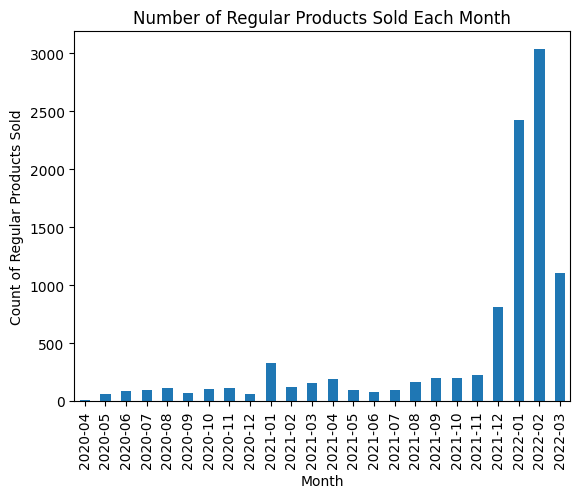

In [57]:
data['regular_items_count'] = data.apply(count_regulars, axis=1)


monthly_regulars = data.groupby([data['order_date'].dt.year, data['order_date'].dt.month])['regular_items_count'].sum()

monthly_regulars.plot(kind='bar')
plt.title('Number of Regular Products Sold Each Month')
plt.xlabel('Month')
plt.ylabel('Count of Regular Products Sold')
plt.xticks(ticks=range(len(monthly_regulars)), labels=[f'{year}-{month:02d}' for year, month in monthly_regulars.index], rotation=90)
plt.show()

We can observe that the distribution is very similar to the one of the sold products.

**d. What are the best selling products**

In [58]:
# Flatten the 'ordered_items' lists
all_ordered_items = [item for sublist in data['ordered_items'] for item in sublist]

# Count occurrences of each product
product_counts = pd.Series(all_ordered_items).value_counts()

# Get the top 10 best-selling products
top_10_products = product_counts.head(10)

# Get the informarion of these products
top_10_details = inventory[inventory['variant_id'].isin(top_10_products.index)]
top_10_details

,variant_id,price,compare_at_price,vendor,product_type,tags
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
63,34081589887108,10.79,11.94,oatly,long-life-milk-substitutes,"[oat-milk, vegan]"
109,34284949766276,8.49,9.00,andrex,toilet-roll-kitchen-roll-tissue,[toilet-rolls]
116,33826465153156,1.89,1.99,clearspring,tins-packaged-foods,"[gluten-free, meat-alternatives, vegan]"
476,34537169715332,13.69,13.79,catsan,pet-care,[pet-care]
928,34284950356100,1.99,3.00,fairy,dishwashing,"[discontinue, swapped, washing-up-liquid]"


We can observe that the best-selling products include toilet and kitchen rolls, oat milk, vegan packaged foods, pet-care items, and dishwashing products. However, it is important to note that inventory data for some of these top-selling products is missing. Understanding the reasons for this absence of data is crucial; for instance, these products may have been discontinued. Additionally, investigating what these specific products were could provide further insights.

**e. What are the top 10 clients**

In [59]:
# Flatten users
all_ordered_users = [user_id for user_id in data['user_id']]

# Count occurrences of each client
user_counts = pd.Series(all_ordered_users).value_counts()

# Get the top 10 clients
top_10_clients = user_counts.head(10)

# Get the informarion of these clients
top_10_clients_details = users[users['user_id'].isin(top_10_clients.index)]
top_10_clients_details

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets,count_regulars
169,361235e2decd78440db688cc8ca0abf6ec6725dd5a2e6c...,Proposition,None,2021-11-26 13:19:47,2021-11-01,NaN,1.0,NaN,NaN,NaN,20.0
712,51bc89eb83c0d3c049f45d4935207f2d39e80b02931521...,Proposition,UKH,2021-09-14 16:45:35,2021-09-01,NaN,1.0,NaN,NaN,NaN,28.0
750,a8ea4d1ff9cfc5005b7354d1d17564347dd842bab2a6c3...,Top Up,UKF,2022-01-31 21:11:09,2022-01-01,NaN,1.0,NaN,NaN,NaN,0.0
832,111d37baa4fb9dde7c557b4057dfd7eff8205dc0e27190...,Top Up,UKL,2021-11-30 15:08:45,2021-11-01,NaN,1.0,NaN,NaN,NaN,9.0
1145,a124c8bb0453ea0957405b7a08a7fd377247bac054a097...,Proposition,UKK,2021-12-08 19:53:09,2021-12-01,NaN,1.0,NaN,NaN,NaN,49.0
2005,fffd9f989509e36d1fc3e3e53627d6341482f385052a03...,Top Up,UKF,2021-10-21 18:17:53,2021-10-01,NaN,1.0,NaN,NaN,NaN,11.0
2771,4481102740bca52c40ca264bf88c39f0bc7d1f461b0629...,Top Up,UKJ,2021-04-20 09:57:51,2021-04-01,4.0,3.0,1.0,0.0,1.0,53.0
2997,1dacfd2a360677052d8605f843ae410dd23b0ddb7f506c...,Proposition,UKG,2021-08-06 09:23:27,2021-08-01,NaN,1.0,NaN,NaN,NaN,16.0
3476,a725fbe5a75dce9540b3ed082270e4e357425949bae903...,Top Up,UKH,2022-01-12 13:38:49,2022-01-01,NaN,1.0,NaN,NaN,NaN,7.0
3505,257be7ae940425880bbb20bf162c2616b32881bf0a8bda...,Top Up,UKI,2021-06-10 15:00:55,2021-06-01,4.0,2.0,2.0,0.0,0.0,36.0


**f. What is the profile of the clients?**

As previously mentioned, I will only be working with a subset of the clients; with those that have information regarding their household.

In [60]:
family_codes = [col for col in users.columns if col.startswith('count')]
familiy_inputs = users.count_people.dropna().count()

household_info = {f"any_{col}" : (users[col]>0).sum() / familiy_inputs for col in family_codes}
household_info

{'any_count_people': 0.9938461538461538,
 'any_count_adults': 15.323076923076924,
 'any_count_children': 0.4,
 'any_count_babies': 0.07076923076923076,
 'any_count_pets': 0.40615384615384614,
 'any_count_regulars': 4.455384615384616}

In [64]:
# Households with either pets, children or babies
(users[['count_children', 'count_babies', 'count_pets']].sum(axis=1) > 0).sum() / familiy_inputs

0.6123076923076923

We can observe that 40% of the houses have children, 7% have babies, and 40% have pets. Additionally, we can observe that 61% of the houses have either pets, children or babies. 

In [70]:
print(familiy_inputs)
print(len(users))
print(familiy_inputs/len(users))

325
4983
0.06522175396347582


Nevertheless, it is worth mentioning that this subset only represents 6% of our clients, as we obly have family composition information for this small subset. 

Now, we will see the NUTS1 distribution:

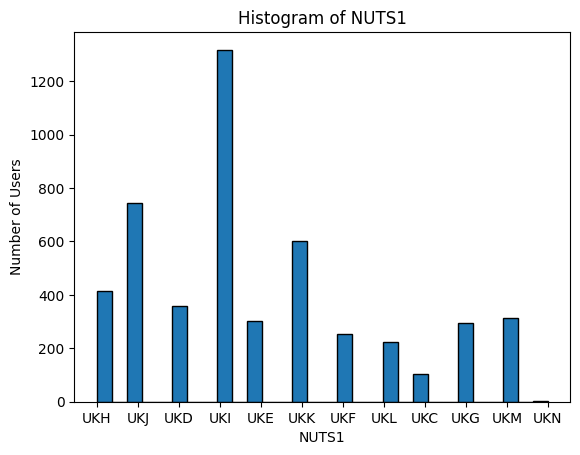

In [81]:
plt.hist(users['user_nuts1'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of NUTS1')
plt.xlabel('NUTS1')
plt.ylabel('Number of Users')
plt.show()

We can observe that most users come from UKI, and all of them are from UK.

**g. Are our clients loyal, or do they only have one order?**

<Axes: xlabel='user_order_seq'>

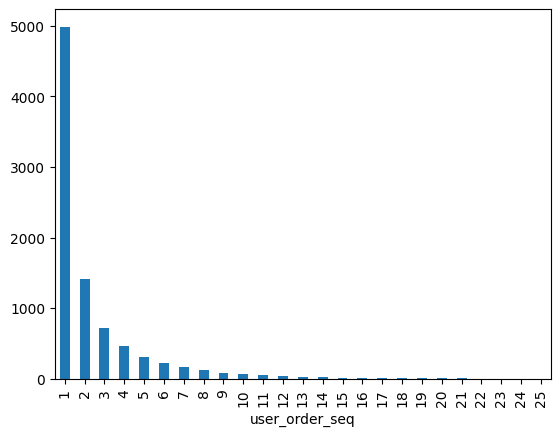

In [92]:
orders['user_order_seq'].value_counts().plot(kind="bar")

Unfortunately, it appears that the majority of our users place only a single order and do not return. This pattern suggests potential areas for improvement in customer retention strategies.

**h. Do users define their regular products?**

In [61]:
users.describe()

,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets,count_regulars
count,4983,4983,325.000000,4983.000000,325.000000,325.000000,325.000000,4983.000000
mean,2021-08-20 02:41:47.038330,2021-08-04 22:37:03.720650,2.787692,1.065422,0.707692,0.076923,0.636923,2.481437
min,2020-04-30 14:32:19,2020-04-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-04-08 12:55:48.500000,2021-04-01 00:00:00,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2021-10-26 22:48:14,2021-10-01 00:00:00,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2022-01-03 12:38:51.500000,2022-01-01 00:00:00,4.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,2022-03-12 14:48:34,2022-03-01 00:00:00,8.000000,7.000000,6.000000,2.000000,6.000000,320.000000
std,NaN,NaN,1.365753,0.332464,1.026246,0.289086,0.995603,8.890588


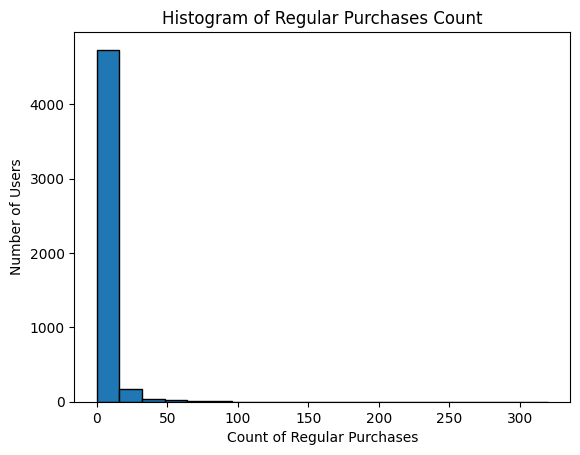

In [78]:
plt.hist(users['count_regulars'], bins=20, edgecolor='black')
plt.title('Histogram of Regular Purchases Count')
plt.xlabel('Count of Regular Purchases')
plt.ylabel('Number of Users')
plt.show()

Since there are too many instances for 0 and too few for the maximum, I use the logarithmic scale to make the data easier to analyze and visualize

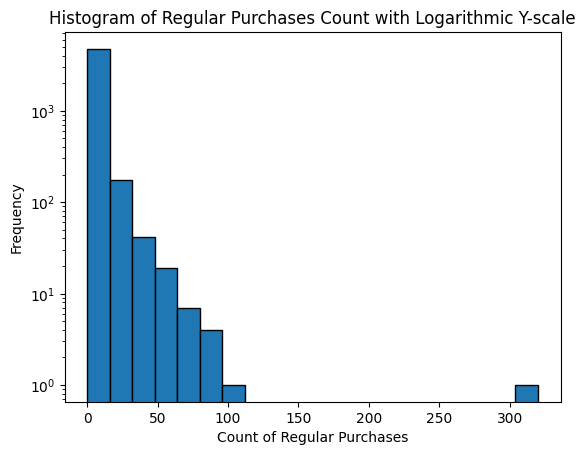

In [77]:
# Plotting the histogram of the logarithmically transformed data
plt.hist(users['count_regulars'], bins=20, edgecolor='black')
plt.yscale('log')
plt.title('Histogram of Regular Purchases Count with Logarithmic Y-scale')
plt.xlabel('Count of Regular Purchases')
plt.ylabel('Frequency')
plt.show()

We can observe that there is a user with 320 products classfied as regular, whereas 75% of the users don't have any favourite product.

**i. What kind of products do users define as their regualars**

In [91]:
# Flatten the 'variant_id' lists
all_regular_items = [item for item in regulars['variant_id']]

# Count occurrences of each regular product
regular_counts = pd.Series(all_regular_items).value_counts()

# Get the top 10 saved as regular products
top_10_regulars = regular_counts.head(10)

# Get the informarion of these products
top_10_details = inventory[inventory['variant_id'].isin(top_10_regulars.index)]
top_10_details

,variant_id,price,compare_at_price,vendor,product_type,tags
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
63,34081589887108,10.79,11.94,oatly,long-life-milk-substitutes,"[oat-milk, vegan]"
109,34284949766276,8.49,9.00,andrex,toilet-roll-kitchen-roll-tissue,[toilet-rolls]
139,34370915041412,4.99,6.60,mutti,tins-packaged-foods,"[pasta-pizza-sauce, tinned-tomatoes-puree-pass..."
210,34436055302276,3.29,4.35,marmite,spreads,"[savoury-spreads, vegan]"
241,34037939372164,4.99,5.25,andrex,toilet-roll-kitchen-roll-tissue,[toilet-rolls]
251,33667282436228,3.99,4.00,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, kitchen-roll, vegan]"
928,34284950356100,1.99,3.00,fairy,dishwashing,"[discontinue, swapped, washing-up-liquid]"


The product most frequently saved by customers is toilet/kitchen rolls, with "whogivesacrap" and "Plenty" emerging as the leading vendors in this category. Notably, both vendors primarily supply toilet rolls, highlighting their popularity among consumers. Additionally, oat milk from Oatly stands out as another highly favored item. An interesting trend observed from the data is the strong preference for vegan products among clients, as evidenced by their regular inclusion of such items on their lists.